### first try to merge all separated data into one pickle file

In [17]:
import os
pdg_list = os.listdir("./pdg_db_dir001/")
pdg_dict = {}
for p in pdg_list:
    if p != ".keep" and p != ".ipynb_checkpoints":
        print("\r# processing {}/{}".format(len(pdg_dict), len(pdg_list)), end="")
        pdg_dict[p] = {}
        sub_list = os.listdir("./pdg_db_dir001/{}/".format(p))
        for q in sub_list:
            if q != ".keep" and q != ".ipynb_checkpoints":
                with open("./pdg_db_dir001/{}/{}".format(p,q), "rb") as f:
                    tmp_pdg = pickle.load(f)
                pdg_dict[p][q] = tmp_pdg

# processing 999/1001

In [18]:
with open("./pdg_db_dir001.pkl", "wb") as f:
    pickle.dump(pdg_dict, f)

### view the pdg

In [1]:
import pickle
from igraph import *

In [4]:
with open("./pdg_db_dir001/1003/main_4680", "rb") as f:
    dt = pickle.load(f)

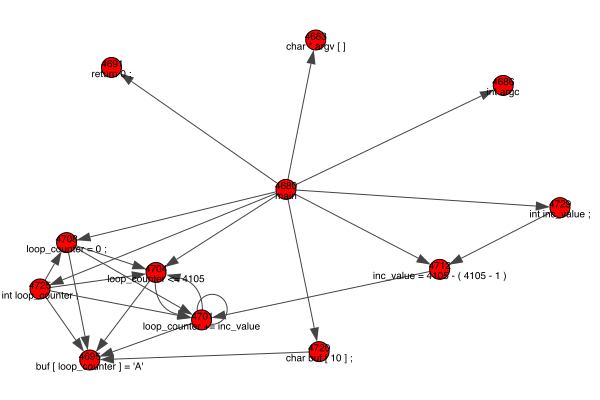

In [6]:
for p in dt.vs:
    p["label_size"]=10
visual_style = {}
visual_style["margin"]=40
visual_style["bbox"]=(600,400)
visual_style["vertex_label"] = [
    "{} \n {}".format(dt.vs["name"][i], dt.vs["code"][i]) 
    for i in range(len(dt.vs["code"]))
]
plot(dt, **visual_style)

### view the interesting points

In [70]:
with open("./points_dir001/arrayuse_slice_points.pkl", "rb") as f:
    dt_arrayuse = pickle.load(f)

# data format: [
#     ([<node_id>, ...], <root_node_id>, <api_name>),
#     ...
# ]
# e.g., (['407684'], '407677', 'fclose')
with open("./points_dir001/sensifunc_slice_points.pkl", "rb") as f:
    dt_sensitive = pickle.load(f)
    
with open("./points_dir001/integeroverflow_slice_points_new.pkl", "rb") as f:
    dt_integer = pickle.load(f)
    
with open("./points_dir001/pointuse_slice_points.pkl", "rb") as f:
    dt_pointuse = pickle.load(f)

In [73]:
dt_arrayuse['149382']

[(['411768'], '410516', 'smi_paths_fields'),
 (['411764'], '410516', 'smi_paths_fields'),
 (['411865'], '410516', 'smi_paths_fields'),
 (['411811'], '410516', 'smi_fields'),
 (['411807'], '410516', 'smi_fields'),
 (['411911'], '410516', 'smi_fields')]

In [50]:
'149382' in pdg_dict.keys()

True

In [51]:
for dkey in pdg_dict['149382'].keys():
    if '410516' in dkey:
        print("hit: {}".format(dkey))

hit: register_mibs_410516


In [74]:
pdg_dict['149382']['register_mibs_410516'].vs['name']

In [65]:
node_ids = []
for dkey in pdg_dict['149382'].keys():
    if len(pdg_dict['149382'][dkey].vs) > 0:
        # node_ids += pdg_dict['149382'][dkey].vs['name']
        if '411807' in pdg_dict['149382'][dkey].vs['name']:
            print("found: {}".format(dkey))

found: register_mibs_410516


In [67]:
pdg_dict['149382']['register_mibs_410516'].vs["name"].index('411911')

ValueError: '411911' is not in list

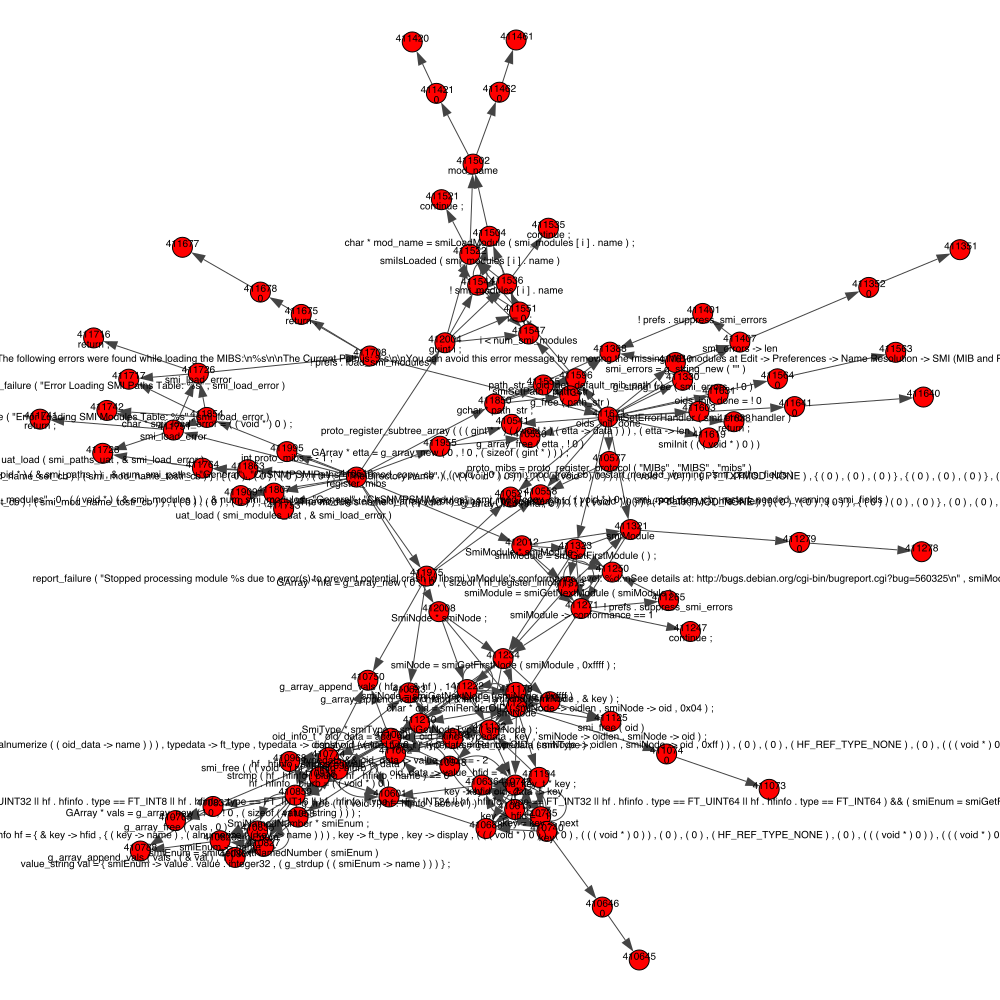

In [52]:
view_dt = pdg_dict['149382']['register_mibs_410516']
for p in view_dt.vs:
    p["label_size"]=10
visual_style = {}
visual_style["margin"]=40
visual_style["bbox"]=(1000,1000)
visual_style["vertex_label"] = [
    "{} \n {}".format(view_dt.vs["name"][i], view_dt.vs["code"][i]) 
    for i in range(len(view_dt.vs["code"]))
]
plot(view_dt, **visual_style)

### igraph operations

In [77]:
tmp_dt = pdg_dict['149382']['oid_resolved_from_encoded_413302']

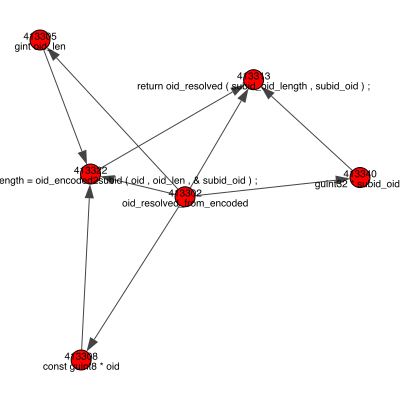

In [82]:
for p in tmp_dt.vs:
    p["label_size"]=10
visual_style = {}
visual_style["margin"]=40
visual_style["bbox"]=(400,400)
visual_style["vertex_label"] = [
    "{} \n {}".format(tmp_dt.vs["name"][i], tmp_dt.vs["code"][i]) 
    for i in range(len(tmp_dt.vs["code"]))
]
plot(tmp_dt, **visual_style)

In [84]:
tmp_dt.vs["name"]

['413305', '413322', '413308', '413313', '413340', '413302']

In [85]:
tmp_dt.vs[2]

igraph.Vertex(<igraph.Graph object at 0x7fbaa39895e0>, 2, {'code': 'const guint8 * oid', 'name': '413308', 'filepath': '/opt/ReSySeVR/data/SARD/dir_001/149382/oids.c', 'location': '1108:39:35701:35717', 'type': 'Parameter', 'functionId': '413302', 'label_size': 10})

In [86]:
dir(tmp_dt.vs[2])

['__class__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'all_edges',
 'attribute_names',
 'attributes',
 'betweenness',
 'closeness',
 'constraint',
 'degree',
 'delete',
 'diversity',
 'eccentricity',
 'get_shortest_paths',
 'graph',
 'in_edges',
 'incident',
 'indegree',
 'index',
 'is_minimal_separator',
 'is_separator',
 'neighbors',
 'out_edges',
 'outdegree',
 'pagerank',
 'personalized_pagerank',
 'predecessors',
 'shortest_paths',
 'strength',
 'successors',
 'update_attributes']

In [90]:
tmp_dt.vs[2].predecessors()

[igraph.Vertex(<igraph.Graph object at 0x7fbaa39895e0>, 5, {'code': 'oid_resolved_from_encoded', 'name': '413302', 'filepath': '/opt/ReSySeVR/data/SARD/dir_001/149382/oids.c', 'location': '1108:0:35662:35878', 'type': 'Function', 'functionId': '413302', 'label_size': 10})]

In [129]:
tmp_sub = tmp_dt.subgraph([2,5,2])

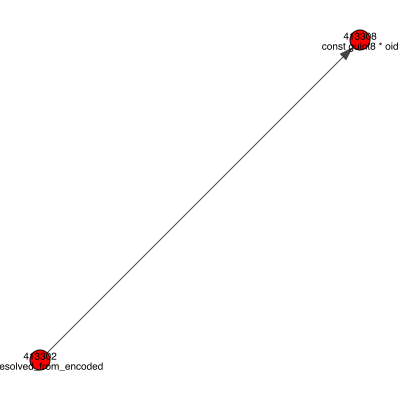

In [130]:
for p in tmp_sub.vs:
    p["label_size"]=10
visual_style = {}
visual_style["margin"]=40
visual_style["bbox"]=(400,400)
visual_style["vertex_label"] = [
    "{} \n {}".format(tmp_sub.vs["name"][i], tmp_sub.vs["code"][i]) 
    for i in range(len(tmp_sub.vs["code"]))
]
plot(tmp_sub, **visual_style)

### view the labeling related data

In [98]:
with open("./dict_cwe2father.pkl", "rb") as f:
    dt_cwe2father = pickle.load(f)
    
with open("./dict_flawline2filepath.pkl", "rb") as f:
    dt_flaw2file = pickle.load(f)
    
with open("./dict_testcase2code.pkl", "rb") as f:
    dt_test2code = pickle.load(f)

In [102]:
list(dt_cwe2father.keys())[0]

'CWE-124'

In [103]:
dt_cwe2father['CWE-124']

['CWE-786', 'CWE-787']

In [106]:
list(dt_flaw2file.keys())[0]

'000074218/CWE124_Buffer_Underwrite__CWE839_rand_45.c'

In [107]:
dt_flaw2file["000074218/CWE124_Buffer_Underwrite__CWE839_rand_45.c"]

[{'36': 'CWE-124'}]

In [110]:
list(dt_test2code.keys())[0]

'000074218/CWE124_Buffer_Underwrite__CWE839_rand_45.c/36'

In [111]:
dt_test2code["000074218/CWE124_Buffer_Underwrite__CWE839_rand_45.c/36"]

'            buffer[data] = 1;\r'

In [119]:
pdg_dict['149382']['my_malloc_407914'].vs['type']

['Parameter', 'ReturnStatement', 'Condition', 'ReturnStatement', 'Function']

In [120]:
pdg_dict['149382']['my_malloc_407914'].vs[-1]

igraph.Vertex(<igraph.Graph object at 0x7fbaa123c130>, 4, {'code': 'my_malloc', 'name': '407914', 'filepath': '/opt/ReSySeVR/data/SARD/dir_001/149382/oids.c', 'location': '157:0:7168:7293', 'type': 'Function', 'functionId': '407914'})

### others

In [122]:
pdg_dict['149382']['my_malloc_407914'].es[0]

igraph.Edge(<igraph.Graph object at 0x7fbaa123c130>, 0, {'var': 'size'})

In [128]:
pdg_dict['149382']['my_malloc_407914'].vs[0]["name"]

'407917'

In [1]:
import pickle
with open("./SARD_ready/all_subgraphs_all_e3.pkl", "rb") as f:
    dt = pickle.load(f)

In [9]:
tt = [p[0] for p in dt]
from collections import Counter
Counter(tt)

Counter({False: 107926, True: 20845})

In [7]:
nvs_list = []
nes_list = []
for p in dt:
    nvs_list.append(len(p[1][0].vs))
    nes_list.append(len(p[1][0].es))

In [5]:
import statistics

In [6]:
statistics.mean(nvs_list)

8.210301807882033

In [8]:
statistics.mean(nes_list)

19.20063691316421